<a href="https://colab.research.google.com/github/AdrianoKeki/lia1_2024_1/blob/main/Aula_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow - Cifar-10
Problema: construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: airplane; automobile; bird; cat; deer; dog; frog; horse; ship; truck.

Não há mágica. Há matemática! 🧙

Codeshare: https://codeshare.io/WLeKey

Fonte de dados

O conjunto de dados CIFAR-10 consiste em 60.000 imagens coloridas (32x32) em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

In [272]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [273]:
# Carrega o dataset Fashion Mnist - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

In [274]:
# Classes das imagens
nomes_classes = ['T-shirt/top', '	Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Pré-Processamento

Fazer pré-processamento nos dados, em nosso caso as imagens


In [275]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [276]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()




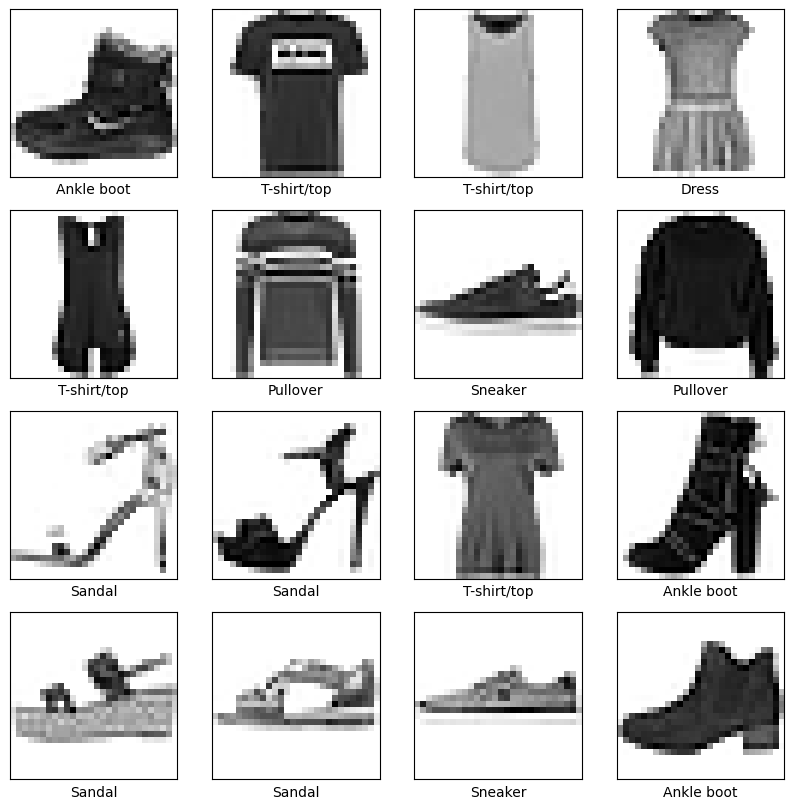

In [277]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

##Construindo a Rede Neural Convolucional
O Keras é uma biblioteca do TensorFlow.

In [278]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [279]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [280]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

##Treinamento

In [281]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 15,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5943 - accuracy: 0.7821 - val_loss: 0.4739 - val_accuracy: 0.8309
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4039 - accuracy: 0.8511 - val_loss: 0.4038 - val_accuracy: 0.8518
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3474 - accuracy: 0.8726 - val_loss: 0.3720 - val_accuracy: 0.8686
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3128 - accuracy: 0.8847 - val_loss: 0.3584 - val_accuracy: 0.8696
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2895 - accuracy: 0.8928 - val_loss: 0.3414 - val_accuracy: 0.8697
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2674 - accuracy: 0.9007 - val_loss: 0.3289 - val_accuracy: 0.8811
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2486 - accuracy: 0.9075 - val_loss: 0.3217 - val_accuracy

##Previsão - Testar o modelo (Deploy)

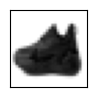

In [294]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/drive/MyDrive/Aula IA/tenis.jpg")

# Redimensiona para 28x28 pixels
nova_imagem = nova_imagem.resize((28, 28))

# Converte para escala de cinza
nova_imagem = nova_imagem.convert('L')

# Use np.squeeze para remover a dimensão extra
nova_imagem = np.squeeze(nova_imagem)

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [295]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [296]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [297]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

print(previsoes)

1/1 [==============================] - 0s 20ms/step
[[9.1536987e-01 1.5504475e-04 9.2506176e-04 1.5600886e-02 1.6242586e-04
  1.4620683e-07 6.7462936e-02 1.0766390e-06 3.1897394e-04 3.4937343e-06]]


In [298]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [299]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: T-shirt/top
